### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

Для начала подгрузим все библиотеки, которые могут нам пригодиться:

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Данные о визитах назовём visits, данные о заказах - orders, о рекламных тратах - dt_costs.

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
dt_costs = pd.read_csv('/datasets/costs_info_short.csv')

Теперь начнем предобработку данных.

### Данные о визитах:

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits.duplicated().sum()

0

Дубликатов нет.Заголовки столбцов надо менять. Так же надо менять тип данных в столбцах, содержащих информацию о времени начала и окончания сесси.

In [6]:
visits.columns.to_list()

['User Id', 'Region', 'Device', 'Channel', 'Session Start', 'Session End']

In [7]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [8]:
visits = visits[['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']]

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


### Данные о заказах

In [11]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [13]:
orders.duplicated().sum()

0

Дубликатов нет.Заголовки столбцов надо менять. Так же надо менять тип данных в столбце, содержащем информацию о дате и времени покупки.

In [14]:
orders.columns.to_list()

['User Id', 'Event Dt', 'Revenue']

In [15]:
orders.columns = ['user_id', 'event_dt', 'revenue']

In [16]:
orders = orders[['user_id', 'event_dt', 'revenue']]

In [17]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


### Данные о рекламных тратах

In [19]:
dt_costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [20]:
dt_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [21]:
dt_costs.duplicated().sum()

0

Дубликатов нет.Заголовки столбцов надо менять. Так же надо менять тип данных в столбце, содержащем информацию о дате.

In [22]:
dt_costs.columns.to_list()

['dt', 'Channel', 'costs']

In [23]:
dt_costs.columns = ['dt', 'channel', 'costs']

In [24]:
dt_costs = dt_costs[['dt', 'channel', 'costs']]

In [25]:
dt_costs['dt'] = pd.to_datetime(dt_costs['dt']).dt.date

In [26]:
dt_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


## Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

### get_profiles()

In [27]:
def get_profiles(visits, orders, dt_costs):
    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'region': 'first',
                'device': 'first',
                'channel': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    new_users['dt']=pd.to_datetime(new_users['dt']).dt.date
    # объединяем траты на рекламу и число привлечённых пользователей
    dt_costs = dt_costs.merge(new_users, on=['dt', 'channel'], how='left')
    # делим рекламные расходы на число привлечённых пользователей
    dt_costs['acquisition_cost'] = dt_costs['costs'] / dt_costs['unique_users']
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        dt_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    return profiles
        

### get_conversion()

In [28]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []
    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### get_retention()

In [29]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time
        

### get_ltv()

In [30]:
def get_ltv(profiles, purchases, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
 
 
    # Шаг 1. Получить профили пользователей и список пользовательских покупок
    # мы получаем их через аргументы profiles и purchases
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
 
    # Шаг 2. Присоединить покупки к профилям пользователей и расчитать для каждой покупки время жизни пользователя (lifetime)
    # формируем массив сырых данных
    result_raw = result_raw.merge(purchases[['user_id', 'event_dt', 'revenue']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # этот столбец мы будем использовать для группировки в случае, когда в dimensions ничего не передано
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']  
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):  
        # Шаг 3. Построить сводную таблицу, у которой в строках находятся даты первой посещения пользователей, в столбцах - lifetime, а в ячейках сумма покупок пользователей на заданный лайфтайм. Таким образом, мы получим таблицу выручки
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'revenue', aggfunc = 'sum')         # строим "треугольную таблицу"         
        
        # Шаг 4. Просуммировать ячейки таблицы конверсии вдоль каждого ряда с накоплением
        result = result.fillna(0).cumsum(axis = 1)
        
        print('result')
        display(result)
        
        # Шаг 5. Расчитать размеры когорт и соединить таблицы размеров когорт и таблицу конверсии
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        
        print('cohort_size')
        display(cohort_sizes)
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        
        # Шаг 6. Разделить каждую ячейку таблицы выручки на соответствующий размер когорты
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты 
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        
        # Шаг 7. Расчитать CAC
        # в таблице df одному пользователю соответствует несколько строк, поэтому 
        # вернемся к уникальным пользователям с помощью drop_duplicates
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = cac.groupby(dims).agg({'acquisition_cost': 'mean'}).rename(columns = {'acquisition_cost': 'cac'})
        
        print('cac')
        display(cac)
        
        # Шаг 8. Разделить LTV на CAC
        roi = result.div(cac['cac'], axis = 0)
        
        print('roi1')
        display(roi)
        # Шаг 9. Исключить из результатов строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        
        print('roi2')
        display(roi)
        
        # добавим красивости - починим размеры когорт и добавим в таблицу cac
        # и выведем все в формате cohort_size, cac, все остальные столбцы
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        return result, roi
 
    # расчитываем LTV и ROI
    result_grouped, roi_groupped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем LTV и ROI по всем параметрам + дата
    if 'cohort' in dimensions: dimensions = []  # здесь у нас есть дополнительное измерение - дата, поэтому cohort больше не понадобится
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы LTV, ROI и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time, roi_groupped, roi_in_time

### filter_data()

In [31]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### plot_retention()

In [32]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### plot_conversion()

In [33]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### plot_ltv_roi()

In [34]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Для постороения профилей пользователей воспользуемся функцией get_profiles:

In [35]:
profiles = get_profiles(visits, orders, dt_costs)
profiles.head()

,user_id,first_ts,region,device,channel,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,United States,Mac,FaceBoom,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,United States,iPhone,FaceBoom,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,France,iPhone,organic,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,Germany,PC,AdNonSense,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,United States,iPhone,YRabbit,2019-10-02,2019-10-01,False,0.230769


Исключим "естественных" клиентов:

In [36]:
#profiles = profiles.query('channel != "organic"')
#profiles.head()

Определим минимальную и максимальную даты привлечения пользователей:

In [37]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [38]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [39]:
regions = profiles.groupby('region').agg({'payer':'sum', 'user_id':'nunique'}).sort_values(by='payer', ascending=False)
regions['payer_share'] = (regions['payer']/regions['user_id']*100).round(2)
regions = regions[['user_id','payer_share']].reset_index()
regions

,region,user_id,payer_share
0,United States,100002,6.90
1,UK,17575,3.98
2,France,17450,3.80
3,Germany,14981,4.11


<AxesSubplot:xlabel='region', ylabel='user_id'>

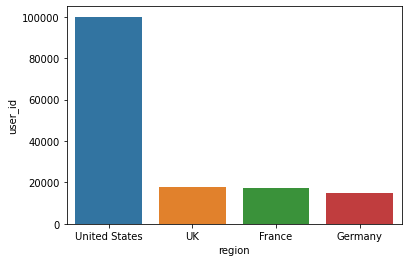

In [40]:
sns.barplot(x=regions['region'], y=regions['user_id'])

<AxesSubplot:xlabel='region', ylabel='payer_share'>

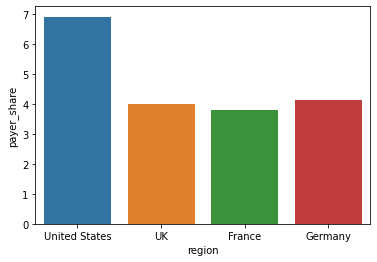

In [41]:
sns.barplot(x=regions['region'], y=regions['payer_share'])

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [42]:
channels = profiles.groupby('channel').agg({'payer':'sum', 'user_id':'nunique'}).sort_values(by='payer', ascending=False)
channels['payer_share'] = (channels['payer']/channels['user_id']*100).round(2)
channels = channels[['user_id','payer_share']].reset_index()
channels

,channel,user_id,payer_share
0,FaceBoom,29144,12.20
1,TipTop,19561,9.60
2,organic,56439,2.06
3,WahooNetBanner,8553,5.30
4,AdNonSense,3880,11.34
5,RocketSuperAds,4448,7.91
6,LeapBob,8553,3.06
7,OppleCreativeMedia,8605,2.71
8,lambdaMediaAds,2149,10.47
9,YRabbit,4312,3.83


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'FaceBoom'),
  Text(1, 0, 'TipTop'),
  Text(2, 0, 'organic'),
  Text(3, 0, 'WahooNetBanner'),
  Text(4, 0, 'AdNonSense'),
  Text(5, 0, 'RocketSuperAds'),
  Text(6, 0, 'LeapBob'),
  Text(7, 0, 'OppleCreativeMedia'),
  Text(8, 0, 'lambdaMediaAds'),
  Text(9, 0, 'YRabbit'),
  Text(10, 0, 'MediaTornado')])

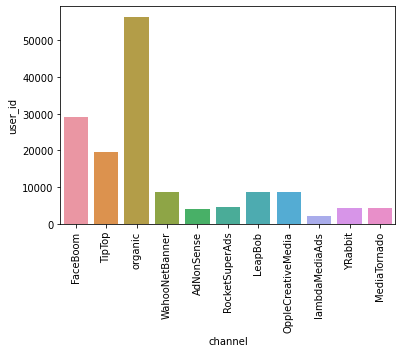

In [43]:
sns.barplot(x=channels['channel'], y=channels['user_id'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'FaceBoom'),
  Text(1, 0, 'TipTop'),
  Text(2, 0, 'organic'),
  Text(3, 0, 'WahooNetBanner'),
  Text(4, 0, 'AdNonSense'),
  Text(5, 0, 'RocketSuperAds'),
  Text(6, 0, 'LeapBob'),
  Text(7, 0, 'OppleCreativeMedia'),
  Text(8, 0, 'lambdaMediaAds'),
  Text(9, 0, 'YRabbit'),
  Text(10, 0, 'MediaTornado')])

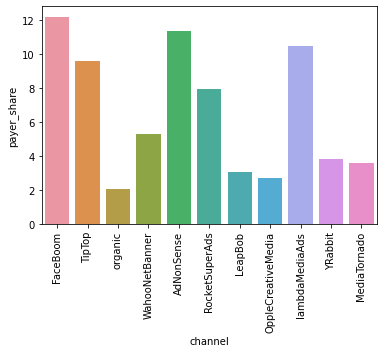

In [44]:
sns.barplot(x=channels['channel'], y=channels['payer_share'], )
plt.xticks(rotation=90)

### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построем таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [45]:
devices = profiles.groupby('device').agg({'payer':'sum', 'user_id':'nunique'}).sort_values(by='payer', ascending=False)
devices['payer_share'] = (devices['payer']/devices['user_id']*100).round(2)
devices = devices[['user_id','payer_share']].reset_index()
devices

,device,user_id,payer_share
0,iPhone,54479,6.21
1,Android,35032,5.85
2,Mac,30042,6.36
3,PC,30455,5.05


<AxesSubplot:xlabel='device', ylabel='user_id'>

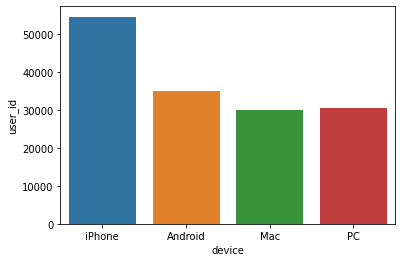

In [46]:
sns.barplot(x=devices['device'], y=devices['user_id'])

<AxesSubplot:xlabel='device', ylabel='payer_share'>

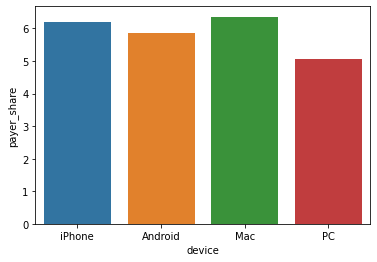

In [47]:
sns.barplot(x=devices['device'], y=devices['payer_share'])

Очевидно, что лидером о привлечению платящих пользователей являются US (штаты берут и количеством и качеством). Что касается каналов привлечения, то лидером является FaceBoom (львиная доля пользователей с хорошим процентом конверсии их в покупателей), TipTop, но стоит обратить внимание на такие каналы, как AdNonSense, lambdaMediaAds и RocketSuperAds. У них достойная конверсия - стоит заняться увеличением потока с этих каналов на мой взгляд. Что касается устройств, то лидер по количеству и "качеству" посетителей IPhone, однако остальные устройства сильно не уступают, а Mac превосходит, основываясь на данных по конверсии, стоит обратить внимание на них - там хорошая конверсия, надо увеличить количество посетителей сайта. Что касается естественных клиентов, то их, конечно больше всего, но в платящих они "превращаются" "со скрипом".

## Шаг 4. Маркетинг

### Выясним, сколько денег потратили? Всего / на каждый источник / по времени

Установим момент и горизонт анализа данных.

In [48]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Посчитаем общую сумму расходов на маркетинг.

In [49]:
costs_sum = dt_costs['costs'].sum()
display(costs_sum)

105497.30000000002

Посмотрим общие траты по каждому каналу:

In [50]:
channel_sum = dt_costs.groupby('channel').sum()
channel_sum = channel_sum['costs']
channel_sum

channel
AdNonSense             3911.25
FaceBoom              32445.60
LeapBob                1797.60
MediaTornado            954.48
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
TipTop                54751.30
WahooNetBanner         5151.00
YRabbit                 944.22
lambdaMediaAds         1557.60
Name: costs, dtype: float64

Выясним, как траты распределены по источникам во времени:

In [51]:
dt_costs['dt']=pd.to_datetime(dt_costs['dt'])
dt_costs['week']=dt_costs['dt'].dt.isocalendar().week
dt_costs['month']=dt_costs['dt'].dt.month

Text(0, 0.5, 'Стоимость')

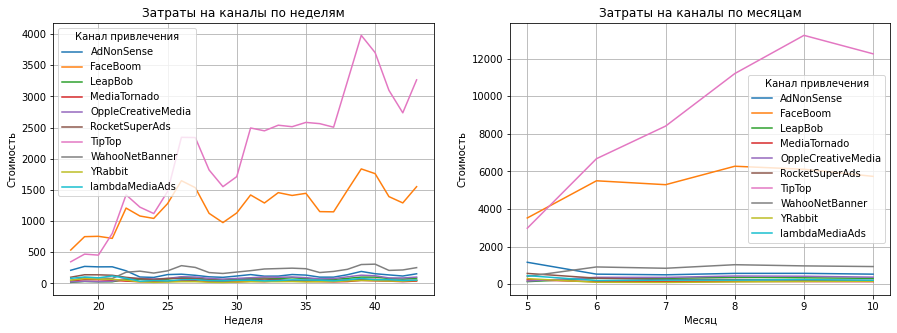

In [52]:
ax1=plt.subplot(1,2,1)
dt_costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15,5), ax=ax1)
plt.legend(title='Канал привлечения')
ax1.set_title('Затраты на каналы по неделям')
plt.xlabel('Неделя')
plt.ylabel('Стоимость')

ax2=plt.subplot(1,2,2)
dt_costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15,5), ax=ax2)
plt.legend(title='Канал привлечения')
ax2.set_title('Затраты на каналы по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')

### Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника:

Исключим "естественных" клиентов:

In [53]:
profiles = profiles.query('channel != "organic"')
profiles.head()

,user_id,first_ts,region,device,channel,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,United States,Mac,FaceBoom,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,United States,iPhone,FaceBoom,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,Germany,PC,AdNonSense,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,United States,iPhone,YRabbit,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,France,Android,AdNonSense,2019-06-30,2019-06-01,True,1.008000


In [54]:
cac_channel=pd.DataFrame()
cac_channel['acquisition_cost_mean']=profiles.groupby('channel')['acquisition_cost'].mean()
cac_channel.sort_values('acquisition_cost_mean', ascending=False)

,acquisition_cost_mean
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Посмотрим средний САС на одного пользователя для всего проекта:

In [55]:
cac_mean=cac_channel['acquisition_cost_mean'].mean()
cac_mean

0.7557348976115401

Посмотрим, как изменялся САС по каналам привлечения:

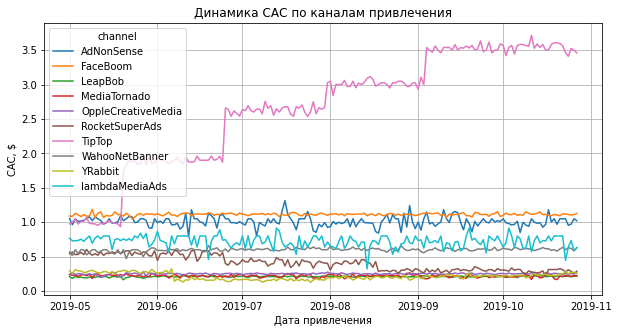

In [56]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Очевидно, что лидером по затратам на рекламу у нас является TipTop, причём динамика роста этих затрат активно положительная. В то время, как остальные каналы ведут себя в этом смысле вполне стабильно.

## Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

In [57]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, datetime(2019,10,1).date(),14)

In [58]:
result_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019,10,1).date(),14)

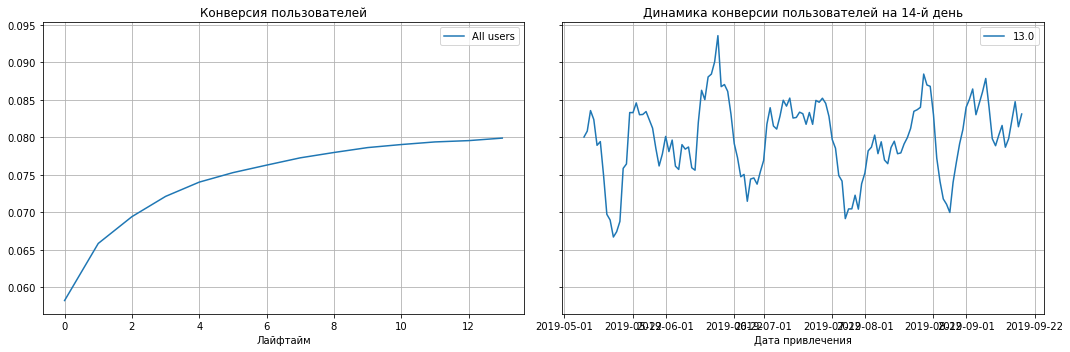

In [59]:
plot_conversion(result_grouped, result_in_time, 14)

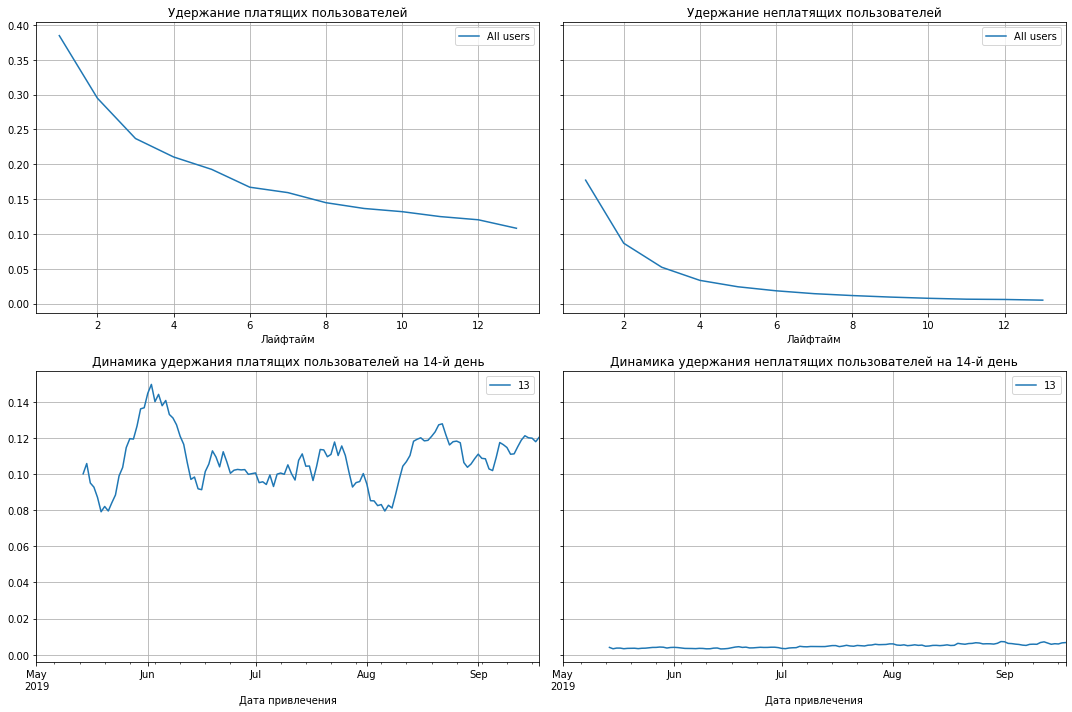

In [60]:
plot_retention(retention, retention_history, 14, 14)

Построим графики LTV и ROI, а так же графики динамики LTV, CAC и ROI:

In [61]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

result


lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0
cohort,,,,,,,,,,,,,,,,,,,,,
All users,30633.6,38626.97,44721.49,49737.23,54200.11,58005.81,61531.37,64690.4,67778.93,70619.54,...,165568.91,165578.89,165598.85,165608.83,165623.8,165628.79,165638.77,165643.76,165658.73,165663.72


cohort_size


,cohort_size
cohort,
All users,88644


cac


,cac
cohort,
All users,1.117794


roi1


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,79302.619489,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


roi2


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,79302.619489,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


result


lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0
dt,,,,,,,,,,,,,,,,,,,,,
2019-05-01,114.77,149.70,169.66,200.60,220.56,220.56,225.55,235.53,265.47,295.44,...,1173.95,1178.94,1178.94,1183.93,1183.93,1183.93,1183.93,1188.92,1203.89,1208.88
2019-05-02,104.79,199.69,214.66,244.60,259.57,284.53,294.51,304.49,324.45,334.43,...,1192.95,1192.95,1197.94,1197.94,1197.94,1197.94,1207.92,1207.92,1207.92,1207.92
2019-05-03,105.79,156.69,196.61,231.54,326.44,341.41,346.40,346.40,371.35,386.32,...,1213.69,1213.69,1213.69,1218.68,1218.68,1223.67,1223.67,1223.67,1223.67,1223.67
2019-05-04,215.66,260.57,285.52,310.47,400.38,435.31,445.29,470.24,485.21,500.18,...,1423.44,1423.44,1428.43,1428.43,1438.41,1438.41,1438.41,1438.41,1438.41,1438.41
2019-05-05,101.81,172.76,182.74,202.70,217.67,227.65,242.62,257.59,262.58,272.56,...,930.28,930.28,935.27,935.27,935.27,935.27,935.27,935.27,935.27,935.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-15,164.67,194.61,219.56,249.51,269.47,279.45,294.42,304.40,309.39,319.37,...,384.24,384.24,384.24,384.24,384.24,384.24,384.24,384.24,384.24,384.24
2019-10-16,114.78,129.75,165.68,190.63,190.63,205.60,226.56,231.55,241.53,246.52,...,281.45,281.45,281.45,281.45,281.45,281.45,281.45,281.45,281.45,281.45
2019-10-17,165.70,195.64,275.57,280.56,285.55,295.53,300.52,315.49,330.46,355.41,...,410.30,410.30,410.30,410.30,410.30,410.30,410.30,410.30,410.30,410.30


cohort_size


,cohort_size
dt,
2019-05-01,390
2019-05-02,323
2019-05-03,346
2019-05-04,457
2019-05-05,438
...,...
2019-10-15,442
2019-10-16,436
2019-10-17,449


cac


,cac
dt,
2019-05-01,0.781590
2019-05-02,0.714690
2019-05-03,0.760318
2019-05-04,0.737418
2019-05-05,0.730377
...,...
2019-10-15,1.251708
2019-10-16,1.345562
2019-10-17,1.309532


roi1


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,498.983006,0.376517,0.491110,0.556591,0.658093,0.723575,0.723575,0.739945,0.772686,0.870907,0.969228,1.034709,1.116561,1.132931,1.149301
2019-05-02,451.943945,0.453941,0.865039,0.929888,1.059585,1.124434,1.232559,1.275791,1.319024,1.405489,1.448721,1.513570,1.513570,1.556802,1.621651
2019-05-03,455.072794,0.402136,0.595621,0.747368,0.880146,1.240886,1.297791,1.316760,1.316760,1.411601,1.468506,1.487475,1.582316,1.658190,1.715095
2019-05-04,619.729970,0.639941,0.773205,0.847240,0.921276,1.188071,1.291721,1.321335,1.395371,1.439792,1.484214,1.528635,1.602671,1.602671,1.647092
2019-05-05,599.690533,0.318251,0.540035,0.571232,0.633626,0.680421,0.711618,0.758413,0.805208,0.820806,0.852003,0.914396,0.929995,0.976790,0.976790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-15,353.117459,0.297639,0.351755,0.396851,0.450986,0.487063,0.505102,0.532160,0.550198,0.559218,0.577256,0.613334,0.622353,0.631373,0.649411
2019-10-16,324.028193,0.195648,0.221165,0.282410,0.324938,0.324938,0.350456,0.386183,0.394689,0.411700,0.420206,0.445723,0.445723,0.462734,0.479746
2019-10-17,342.870506,0.281812,0.332732,0.468672,0.477159,0.485646,0.502619,0.511106,0.536566,0.562026,0.604459,0.629919,0.638406,0.663866,0.663866


roi2


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,498.983006,0.376517,0.491110,0.556591,0.658093,0.723575,0.723575,0.739945,0.772686,0.870907,0.969228,1.034709,1.116561,1.132931,1.149301
2019-05-02,451.943945,0.453941,0.865039,0.929888,1.059585,1.124434,1.232559,1.275791,1.319024,1.405489,1.448721,1.513570,1.513570,1.556802,1.621651
2019-05-03,455.072794,0.402136,0.595621,0.747368,0.880146,1.240886,1.297791,1.316760,1.316760,1.411601,1.468506,1.487475,1.582316,1.658190,1.715095
2019-05-04,619.729970,0.639941,0.773205,0.847240,0.921276,1.188071,1.291721,1.321335,1.395371,1.439792,1.484214,1.528635,1.602671,1.602671,1.647092
2019-05-05,599.690533,0.318251,0.540035,0.571232,0.633626,0.680421,0.711618,0.758413,0.805208,0.820806,0.852003,0.914396,0.929995,0.976790,0.976790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-15,353.117459,0.297639,0.351755,0.396851,0.450986,0.487063,0.505102,0.532160,0.550198,0.559218,0.577256,0.613334,0.622353,0.631373,0.649411
2019-10-16,324.028193,0.195648,0.221165,0.282410,0.324938,0.324938,0.350456,0.386183,0.394689,0.411700,0.420206,0.445723,0.445723,0.462734,0.479746
2019-10-17,342.870506,0.281812,0.332732,0.468672,0.477159,0.485646,0.502619,0.511106,0.536566,0.562026,0.604459,0.629919,0.638406,0.663866,0.663866


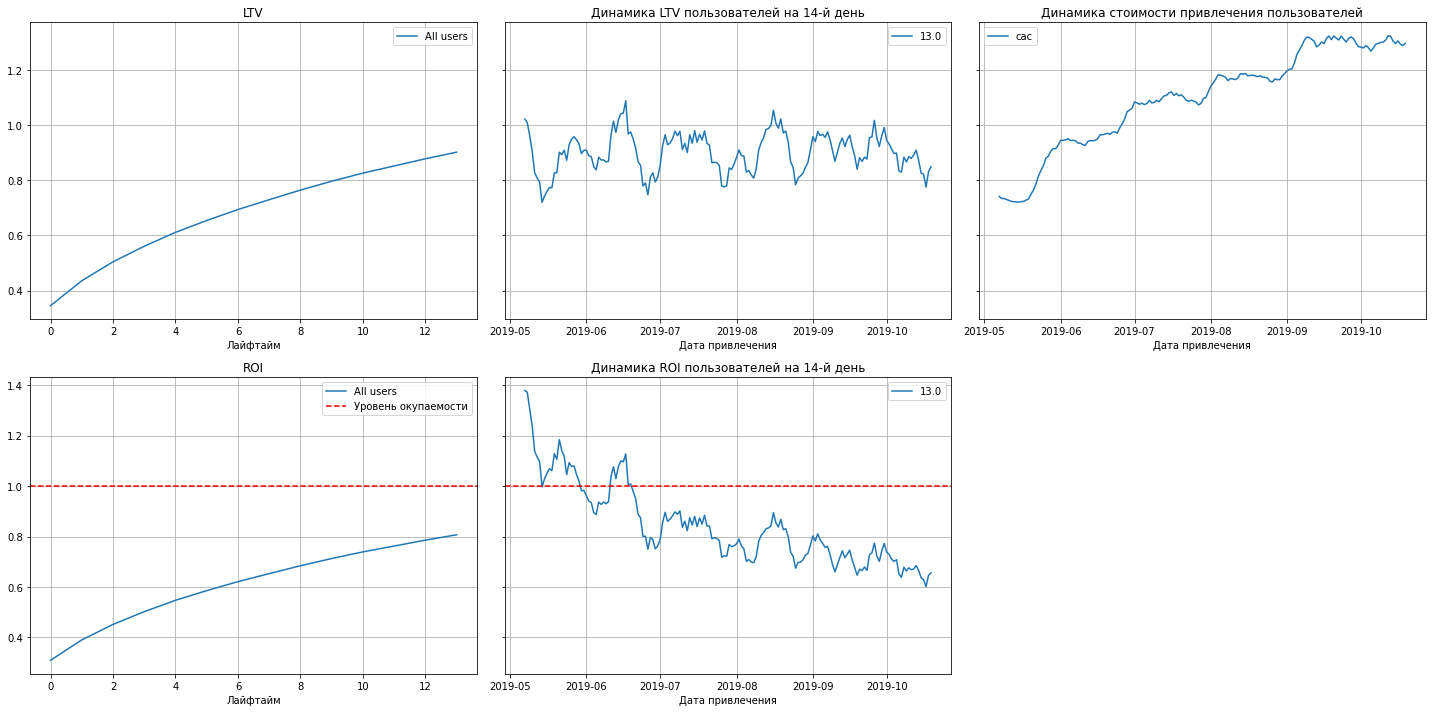

In [62]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
Конверсия покупателе хорошая, но удержние платящих клиентов оставляет желать луучшего.
Реклама не окупается. ROI находится ниже черты окупаемости.
CAC растет. Значит, дело может быть в увеличении рекламного бюджета.
На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

In [63]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

result


lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0
device,,,,,,,,,,,,,,,,,,,,,
Android,7016.04,8909.53,10345.82,11483.58,12578.56,13679.63,14474.16,15275.67,16008.35,16688.08,...,39634.49,39639.48,39644.47,39644.47,39649.46,39649.46,39654.45,39654.45,39659.44,39659.44
Mac,6783.52,8522.45,9763.05,10738.31,11556.80,12170.57,12810.33,13361.26,14037.12,14647.94,...,32711.00,32715.99,32715.99,32715.99,32715.99,32715.99,32720.98,32720.98,32720.98,32720.98
PC,5028.71,6553.93,7802.69,8803.90,9782.17,10543.66,11443.11,12000.00,12707.80,13222.81,...,32984.05,32984.05,32984.05,32984.05,32994.03,32994.03,32994.03,32999.02,33004.01,33004.01
iPhone,11805.33,14641.06,16809.93,18711.44,20282.58,21611.95,22803.77,24053.47,25025.66,26060.71,...,60239.37,60239.37,60254.34,60264.32,60264.32,60269.31,60269.31,60269.31,60274.30,60279.29


cohort_size


,cohort_size
device,
Android,20683
Mac,17747
PC,18128
iPhone,32086


cac


,cac
device,
Android,1.019759
Mac,1.276219
PC,0.792724
iPhone,1.277021


roi1


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20282.244860,0.332645,0.422419,0.490517,0.544460,0.596376,0.648580,0.686250,0.724251,0.758989,0.791216,0.817714,0.839481,0.870765,0.894425
Mac,13905.920356,0.299506,0.376283,0.431058,0.474117,0.510255,0.537354,0.565601,0.589926,0.619766,0.646735,0.671809,0.692961,0.708825,0.729139
PC,22867.974352,0.349933,0.456068,0.542966,0.612637,0.680712,0.733701,0.796291,0.835044,0.884297,0.920135,0.960624,0.994933,1.024449,1.054801
iPhone,25125.660644,0.288114,0.357321,0.410253,0.456661,0.495005,0.527449,0.556536,0.587035,0.610762,0.636023,0.658115,0.679258,0.700380,0.718064


roi2


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20282.244860,0.332645,0.422419,0.490517,0.544460,0.596376,0.648580,0.686250,0.724251,0.758989,0.791216,0.817714,0.839481,0.870765,0.894425
Mac,13905.920356,0.299506,0.376283,0.431058,0.474117,0.510255,0.537354,0.565601,0.589926,0.619766,0.646735,0.671809,0.692961,0.708825,0.729139
PC,22867.974352,0.349933,0.456068,0.542966,0.612637,0.680712,0.733701,0.796291,0.835044,0.884297,0.920135,0.960624,0.994933,1.024449,1.054801
iPhone,25125.660644,0.288114,0.357321,0.410253,0.456661,0.495005,0.527449,0.556536,0.587035,0.610762,0.636023,0.658115,0.679258,0.700380,0.718064


result


lifetime             0.0     1.0     2.0     3.0     4.0     5.0     6.0    \
device  dt                                                                   
Android 2019-05-01   34.93   44.91   49.90   59.88   64.87   64.87   64.87   
        2019-05-02    9.98   74.94   79.93   79.93   79.93   94.91   94.91   
        2019-05-03   19.96   34.93   49.90   64.87   74.85   74.85   74.85   
        2019-05-04   54.89   69.86   74.85   79.84   94.81  104.79  109.78   
        2019-05-05   19.96   69.95   69.95   74.94   74.94   79.93   79.93   
...                    ...     ...     ...     ...     ...     ...     ...   
iPhone  2019-10-15   44.91   49.90   49.90   49.90   54.89   54.89   54.89   
        2019-10-16   49.91   54.90   69.87   74.86   74.86   84.84   90.83   
        2019-10-17   79.84   89.82   99.80  104.79  109.78  114.77  114.77   
        2019-10-18  119.76  134.73  150.70  170.66  170.66  190.62  200.60   
        2019-10-19   99.80  109.78  129.74  149.71  159.69  169.67  169.67   

lifetime             7.0     8.0     9.0    ...   174.0   175.0   176.0  \
device  dt                                  ...                           
Android 2019-05-01   74.85   89.82   94.81  ...  469.15  474.14  474.14   
        2019-05-02  104.89  104.89  109.88  ...  349.49  349.49  349.49   
        2019-05-03   74.85   84.83   84.83  ...  274.47  274.47  274.47   
        2019-05-04  124.75  129.74  134.73  ...  440.12  440.12  440.12   
        2019-05-05   79.93   79.93   79.93  ...  169.75  169.75  169.75   
...                    ...     ...     ...  ...     ...     ...     ...   
iPhone  2019-10-15   54.89   54.89   54.89  ...   59.88   59.88   59.88   
        2019-10-16   90.83   95.82  100.81  ...  115.78  115.78  115.78   
        2019-10-17  114.77  124.75  139.72  ...  159.68  159.68  159.68   
        2019-10-18  210.58  220.56  225.55  ...  250.50  250.50  250.50   
        2019-10-19  184.64  199.61  209.59  ...  259.51  259.51  259.51   

lifetime             177.0   178.0   179.0   180.0   181.0   182.0   183.0  
device  dt                                                                  
Android 2019-05-01  474.14  474.14  474.14  474.14  474.14  479.13  479.13  
        2019-05-02  349.49  349.49  349.49  354.48  354.48  354.48  354.48  
        2019-05-03  274.47  274.47  274.47  274.47  274.47  274.47  274.47  
        2019-05-04  440.12  445.11  445.11  445.11  445.11  445.11  445.11  
        2019-05-05  169.75  169.75  169.75  169.75  169.75  169.75  169.75  
...                    ...     ...     ...     ...     ...     ...     ...  
iPhone  2019-10-15   59.88   59.88   59.88   59.88   59.88   59.88   59.88  
        2019-10-16  115.78  115.78  115.78  115.78  115.78  115.78  115.78  
        2019-10-17  159.68  159.68  159.68  159.68  159.68  159.68  159.68  
        2019-10-18  250.50  250.50  250.50  250.50  250.50  250.50  250.50  
        2019-10-19  259.51  259.51  259.51  259.51  259.51  259.51  259.51  

[688 rows x 184 columns]

cohort_size


cohort_size
device  dt                     
Android 2019-05-01           95
        2019-05-02           73
        2019-05-03           89
        2019-05-04          101
        2019-05-05          103
...                         ...
iPhone  2019-10-15          168
        2019-10-16          157
        2019-10-17          155
        2019-10-18          197
        2019-10-19          238

[688 rows x 1 columns]

cac


cac
device  dt                  
Android 2019-05-01  0.750061
        2019-05-02  0.666357
        2019-05-03  0.780232
        2019-05-04  0.754812
        2019-05-05  0.689570
...                      ...
iPhone  2019-10-15  1.404604
        2019-10-16  1.642934
        2019-10-17  1.479855
        2019-10-18  1.466506
        2019-10-19  1.523096

[688 rows x 1 columns]

roi1


cohort_size       0.0       1.0       2.0       3.0  \
device  dt                                                                
Android 2019-05-01   126.656379  0.490206  0.630265  0.700294  0.840353   
        2019-05-02   109.550850  0.205164  1.540578  1.643160  1.643160   
        2019-05-03   114.068566  0.287440  0.503019  0.718599  0.934178   
        2019-05-04   133.808185  0.720001  0.916365  0.981820  1.047274   
        2019-05-05   149.368454  0.281025  0.984855  0.984855  1.055111   
...                         ...       ...       ...       ...       ...   
iPhone  2019-10-15   119.606623  0.190318  0.211464  0.211464  0.211464   
        2019-10-16    95.560738  0.193494  0.212840  0.270876  0.290222   
        2019-10-17   104.739976  0.348072  0.391581  0.435091  0.456845   
        2019-10-18   134.332923  0.414536  0.466353  0.521631  0.590720   
        2019-10-19   156.260712  0.275313  0.302844  0.357907  0.412997   

                         4.0       5.0       6.0       7.0       8.0  \
device  dt                                                             
Android 2019-05-01  0.910382  0.910382  0.910382  1.050441  1.260529   
        2019-05-02  1.643160  1.951111  1.951111  2.156275  2.156275   
        2019-05-03  1.077898  1.077898  1.077898  1.077898  1.221618   
        2019-05-04  1.243638  1.374548  1.440002  1.636366  1.701821   
        2019-05-05  1.055111  1.125367  1.125367  1.125367  1.125367   
...                      ...       ...       ...       ...       ...   
iPhone  2019-10-15  0.232611  0.232611  0.232611  0.232611  0.232611   
        2019-10-16  0.290222  0.328913  0.352135  0.352135  0.371481   
        2019-10-17  0.478600  0.500354  0.500354  0.500354  0.543863   
        2019-10-18  0.590720  0.659809  0.694354  0.728899  0.763443   
        2019-10-19  0.440528  0.468059  0.468059  0.509356  0.550653   

                         9.0      10.0      11.0      12.0      13.0  
device  dt                                                            
Android 2019-05-01  1.330559  1.330559  1.470617  1.540647  1.610676  
        2019-05-02  2.258857  2.361439  2.361439  2.361439  2.464020  
        2019-05-03  1.221618  1.293478  1.365338  1.437198  1.509058  
        2019-05-04  1.767275  1.832730  1.963639  1.963639  1.963639  
        2019-05-05  1.125367  1.195623  1.195623  1.265880  1.265880  
...                      ...       ...       ...       ...       ...  
iPhone  2019-10-15  0.232611  0.253757  0.253757  0.253757  0.253757  
        2019-10-16  0.390826  0.429517  0.429517  0.429517  0.448863  
        2019-10-17  0.609127  0.630881  0.630881  0.674390  0.674390  
        2019-10-18  0.780716  0.815260  0.849805  0.849805  0.867077  
        2019-10-19  0.578184  0.633275  0.647040  0.715896  0.715896  

[688 rows x 15 columns]

roi2


cohort_size       0.0       1.0       2.0       3.0  \
device  dt                                                                
Android 2019-05-01   126.656379  0.490206  0.630265  0.700294  0.840353   
        2019-05-02   109.550850  0.205164  1.540578  1.643160  1.643160   
        2019-05-03   114.068566  0.287440  0.503019  0.718599  0.934178   
        2019-05-04   133.808185  0.720001  0.916365  0.981820  1.047274   
        2019-05-05   149.368454  0.281025  0.984855  0.984855  1.055111   
...                         ...       ...       ...       ...       ...   
iPhone  2019-10-15   119.606623  0.190318  0.211464  0.211464  0.211464   
        2019-10-16    95.560738  0.193494  0.212840  0.270876  0.290222   
        2019-10-17   104.739976  0.348072  0.391581  0.435091  0.456845   
        2019-10-18   134.332923  0.414536  0.466353  0.521631  0.590720   
        2019-10-19   156.260712  0.275313  0.302844  0.357907  0.412997   

                         4.0       5.0       6.0       7.0       8.0  \
device  dt                                                             
Android 2019-05-01  0.910382  0.910382  0.910382  1.050441  1.260529   
        2019-05-02  1.643160  1.951111  1.951111  2.156275  2.156275   
        2019-05-03  1.077898  1.077898  1.077898  1.077898  1.221618   
        2019-05-04  1.243638  1.374548  1.440002  1.636366  1.701821   
        2019-05-05  1.055111  1.125367  1.125367  1.125367  1.125367   
...                      ...       ...       ...       ...       ...   
iPhone  2019-10-15  0.232611  0.232611  0.232611  0.232611  0.232611   
        2019-10-16  0.290222  0.328913  0.352135  0.352135  0.371481   
        2019-10-17  0.478600  0.500354  0.500354  0.500354  0.543863   
        2019-10-18  0.590720  0.659809  0.694354  0.728899  0.763443   
        2019-10-19  0.440528  0.468059  0.468059  0.509356  0.550653   

                         9.0      10.0      11.0      12.0      13.0  
device  dt                                                            
Android 2019-05-01  1.330559  1.330559  1.470617  1.540647  1.610676  
        2019-05-02  2.258857  2.361439  2.361439  2.361439  2.464020  
        2019-05-03  1.221618  1.293478  1.365338  1.437198  1.509058  
        2019-05-04  1.767275  1.832730  1.963639  1.963639  1.963639  
        2019-05-05  1.125367  1.195623  1.195623  1.265880  1.265880  
...                      ...       ...       ...       ...       ...  
iPhone  2019-10-15  0.232611  0.253757  0.253757  0.253757  0.253757  
        2019-10-16  0.390826  0.429517  0.429517  0.429517  0.448863  
        2019-10-17  0.609127  0.630881  0.630881  0.674390  0.674390  
        2019-10-18  0.780716  0.815260  0.849805  0.849805  0.867077  
        2019-10-19  0.578184  0.633275  0.647040  0.715896  0.715896  

[688 rows x 15 columns]

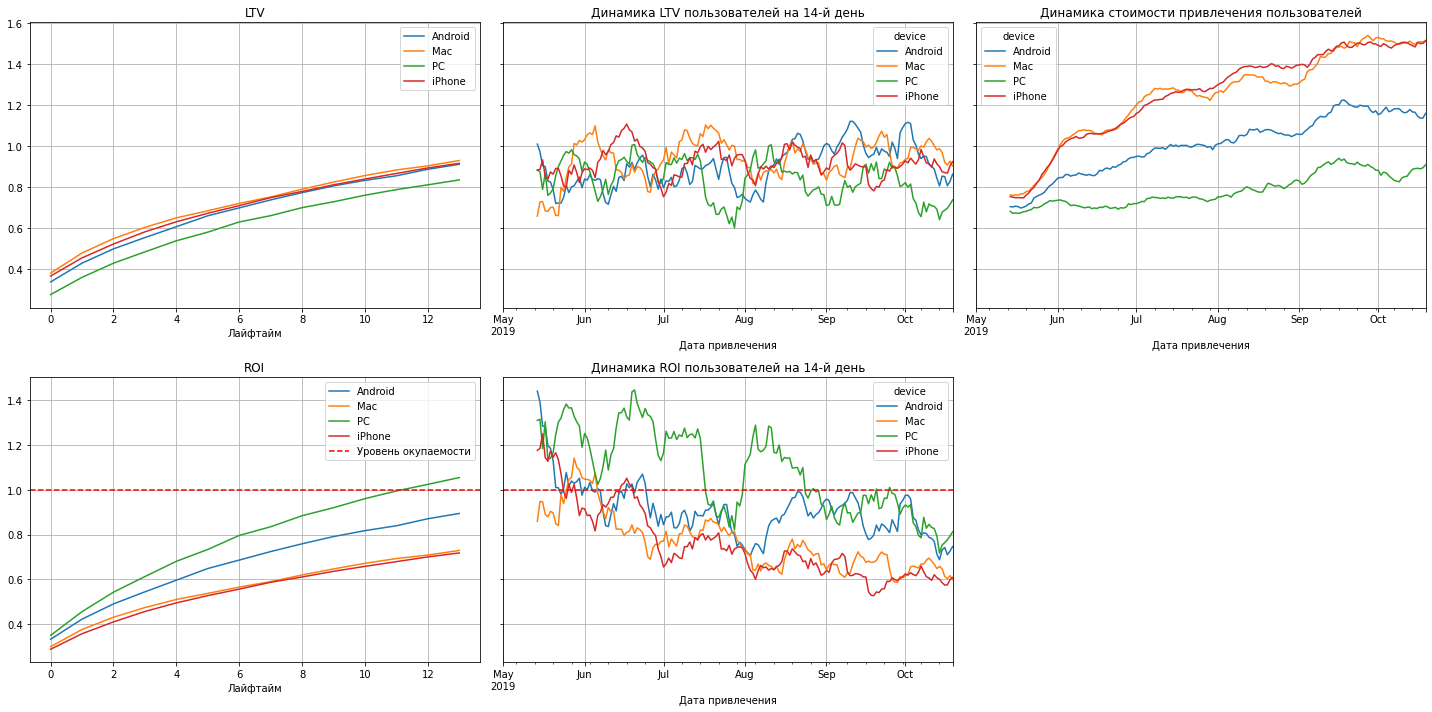

In [64]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Стаибильно окупаются пользователи PC, но и тут видна отрицательная динамика. А вот стоимость привлечения увеличивается у всех устройств. ROI падает, окупаемость проддолжает падать.

### Проанализируйте общую окупаемость рекламы по странам

In [65]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

result


lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0
region,,,,,,,,,,,,,,,,,,,,,
France,2034.09,2731.88,3277.80,3787.85,4278.88,4734.02,5058.40,5333.85,5694.25,6003.65,...,16784.77,16789.76,16789.76,16789.76,16794.75,16794.75,16794.75,16794.75,16794.75,16794.75
Germany,1682.74,2337.49,2961.34,3390.52,3817.67,4161.99,4487.35,4822.69,5157.07,5466.46,...,14258.74,14258.74,14258.74,14258.74,14258.74,14258.74,14263.73,14263.73,14263.73,14263.73
UK,2304.04,3126.68,3873.31,4389.37,4904.56,5309.76,5858.96,6170.34,6571.73,6801.27,...,18618.39,18618.39,18618.39,18623.38,18628.37,18628.37,18628.37,18628.37,18628.37,18628.37
United States,24612.73,30430.92,34609.04,38169.49,41199.00,43800.04,46126.66,48363.52,50355.88,52348.16,...,115907.01,115912.00,115931.96,115936.95,115941.94,115946.93,115951.92,115956.91,115971.88,115976.87


cohort_size


,cohort_size
region,
France,10516
Germany,9030
UK,10536
United States,58562


cac


,cac
region,
France,0.459836
Germany,0.464898
UK,0.454922
United States,1.455876


roi1


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,22869.000193,0.420645,0.564947,0.677842,0.783319,0.884863,0.978985,1.046066,1.103029,1.177559,1.241542,1.304903,1.352373,1.413265,1.457644
Germany,19423.595670,0.400840,0.556806,0.705411,0.807645,0.909395,0.991414,1.068917,1.148797,1.228449,1.302148,1.379887,1.432426,1.487111,1.533709
UK,23160.021923,0.480704,0.652335,0.808109,0.915777,1.023264,1.107802,1.222385,1.287350,1.371094,1.418984,1.470208,1.521847,1.582249,1.634306
United States,40224.579713,0.288682,0.356923,0.405928,0.447689,0.483222,0.513729,0.541018,0.567254,0.590622,0.613990,0.634347,0.653111,0.670649,0.687776


roi2


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,22869.000193,0.420645,0.564947,0.677842,0.783319,0.884863,0.978985,1.046066,1.103029,1.177559,1.241542,1.304903,1.352373,1.413265,1.457644
Germany,19423.595670,0.400840,0.556806,0.705411,0.807645,0.909395,0.991414,1.068917,1.148797,1.228449,1.302148,1.379887,1.432426,1.487111,1.533709
UK,23160.021923,0.480704,0.652335,0.808109,0.915777,1.023264,1.107802,1.222385,1.287350,1.371094,1.418984,1.470208,1.521847,1.582249,1.634306
United States,40224.579713,0.288682,0.356923,0.405928,0.447689,0.483222,0.513729,0.541018,0.567254,0.590622,0.613990,0.634347,0.653111,0.670649,0.687776


result


lifetime                   0.0     1.0     2.0     3.0     4.0     5.0    \
region        dt                                                           
France        2019-05-01    4.99    4.99    4.99    4.99    4.99    4.99   
              2019-05-02    4.99    4.99    4.99    9.98    9.98   19.96   
              2019-05-03   19.96   24.95   29.94   29.94   39.92   39.92   
              2019-05-04    9.98   14.97   19.96   24.95   24.95   29.94   
              2019-05-05    9.98    9.98    9.98    9.98    9.98    9.98   
...                          ...     ...     ...     ...     ...     ...   
United States 2019-10-15  124.75  144.71  154.69  169.66  179.64  184.63   
              2019-10-16   99.81  109.79  140.73  155.70  155.70  170.67   
              2019-10-17  155.72  180.67  210.61  215.60  220.59  225.58   
              2019-10-18  219.59  244.54  274.48  274.48  294.44  319.39   
              2019-10-19  175.65  211.58  246.51  286.44  296.42  321.37   

lifetime                   6.0     7.0     8.0     9.0    ...   174.0   175.0  \
region        dt                                          ...                   
France        2019-05-01    4.99    4.99    4.99    4.99  ...    4.99    4.99   
              2019-05-02   19.96   19.96   19.96   19.96  ...   69.86   69.86   
              2019-05-03   39.92   39.92   44.91   44.91  ...  139.72  139.72   
              2019-05-04   29.94   29.94   34.93   34.93  ...   69.86   69.86   
              2019-05-05    9.98   14.97   14.97   14.97  ...  110.78  110.78   
...                          ...     ...     ...     ...  ...     ...     ...   
United States 2019-10-15  194.61  204.59  204.59  209.58  ...  234.53  234.53   
              2019-10-16  191.63  196.62  206.60  211.59  ...  246.52  246.52   
              2019-10-17  230.57  245.54  260.51  280.47  ...  330.37  330.37   
              2019-10-18  329.37  329.37  344.34  359.31  ...  394.24  394.24   
              2019-10-19  321.37  336.34  351.31  366.28  ...  411.21  411.21   

lifetime                   176.0   177.0   178.0   179.0   180.0   181.0  \
region        dt                                                           
France        2019-05-01    4.99    4.99    4.99    4.99    4.99    4.99   
              2019-05-02   69.86   69.86   69.86   69.86   69.86   69.86   
              2019-05-03  139.72  139.72  139.72  139.72  139.72  139.72   
              2019-05-04   69.86   69.86   69.86   69.86   69.86   69.86   
              2019-05-05  110.78  110.78  110.78  110.78  110.78  110.78   
...                          ...     ...     ...     ...     ...     ...   
United States 2019-10-15  234.53  234.53  234.53  234.53  234.53  234.53   
              2019-10-16  246.52  246.52  246.52  246.52  246.52  246.52   
              2019-10-17  330.37  330.37  330.37  330.37  330.37  330.37   
              2019-10-18  394.24  394.24  394.24  394.24  394.24  394.24   
              2019-10-19  411.21  411.21  411.21  411.21  411.21  411.21   

lifetime                   182.0   183.0  
region        dt                          
France        2019-05-01    4.99    4.99  
              2019-05-02   69.86   69.86  
              2019-05-03  139.72  139.72  
              2019-05-04   69.86   69.86  
              2019-05-05  110.78  110.78  
...                          ...     ...  
United States 2019-10-15  234.53  234.53  
              2019-10-16  246.52  246.52  
              2019-10-17  330.37  330.37  
              2019-10-18  394.24  394.24  
              2019-10-19  411.21  411.21  

[654 rows x 184 columns]

cohort_size


cohort_size
region        dt                     
France        2019-05-01           52
              2019-05-02           27
              2019-05-03           45
              2019-05-04           38
              2019-05-05           44
...                               ...
United States 2019-10-15          286
              2019-10-16          290
              2019-10-17          313
              2019-10-18          375
              2019-10-19          396

[688 rows x 1 columns]

cac


cac
region        dt                  
France        2019-05-01  0.660034
              2019-05-02  0.582389
              2019-05-03  0.672661
              2019-05-04  0.672742
              2019-05-05  0.558166
...                            ...
United States 2019-10-15  1.694283
              2019-10-16  1.792569
              2019-10-17  1.692173
              2019-10-18  1.783573
              2019-10-19  1.783725

[688 rows x 1 columns]

roi1


cohort_size       0.0       1.0       2.0       3.0  \
region        dt                                                                
France        2019-05-01    78.783808  0.145389  0.145389  0.145389  0.145389   
              2019-05-02    46.360754  0.317339  0.317339  0.317339  0.634678   
              2019-05-03    66.898479  0.659404  0.824255  0.989106  0.989106   
              2019-05-04    56.485271  0.390390  0.585585  0.780780  0.975975   
              2019-05-05    78.829544  0.406363  0.406363  0.406363  0.406363   
...                               ...       ...       ...       ...       ...   
United States 2019-10-15   168.802947  0.257447  0.298639  0.319235  0.350128   
              2019-10-16   161.778992  0.192000  0.211198  0.270715  0.299512   
              2019-10-17   184.969319  0.294005  0.341112  0.397640  0.407061   
              2019-10-18   210.252078  0.328315  0.365618  0.410382  0.410382   
              2019-10-19   222.007348  0.248671  0.299538  0.348989  0.405518   

                               4.0       5.0       6.0       7.0       8.0  \
region        dt                                                             
France        2019-05-01  0.145389  0.145389  0.145389  0.145389  0.145389   
              2019-05-02  0.634678  1.269356  1.269356  1.269356  1.269356   
              2019-05-03  1.318809  1.318809  1.318809  1.318809  1.483660   
              2019-05-04  0.975975  1.171170  1.171170  1.171170  1.366365   
              2019-05-05  0.406363  0.406363  0.406363  0.609545  0.609545   
...                            ...       ...       ...       ...       ...   
United States 2019-10-15  0.370724  0.381022  0.401618  0.422214  0.422214   
              2019-10-16  0.299512  0.328309  0.368629  0.378228  0.397426   
              2019-10-17  0.416483  0.425904  0.435325  0.463589  0.491853   
              2019-10-18  0.440225  0.477528  0.492450  0.492450  0.514832   
              2019-10-19  0.419647  0.454970  0.454970  0.476163  0.497356   

                               9.0      10.0      11.0      12.0      13.0  
region        dt                                                            
France        2019-05-01  0.145389  0.145389  0.145389  0.145389  0.145389  
              2019-05-02  1.269356  1.586695  1.586695  1.904034  1.904034  
              2019-05-03  1.483660  1.483660  1.483660  1.483660  1.483660  
              2019-05-04  1.366365  1.366365  1.366365  1.366365  1.366365  
              2019-05-05  0.609545  0.812726  0.812726  0.812726  0.812726  
...                            ...       ...       ...       ...       ...  
United States 2019-10-15  0.432512  0.432512  0.442810  0.453107  0.453107  
              2019-10-16  0.407025  0.435822  0.435822  0.455020  0.474218  
              2019-10-17  0.529538  0.548381  0.557802  0.586066  0.586066  
              2019-10-18  0.537214  0.559596  0.581978  0.589438  0.589438  
              2019-10-19  0.518549  0.539757  0.560950  0.582158  0.582158  

[688 rows x 15 columns]

roi2


cohort_size       0.0       1.0       2.0       3.0  \
region        dt                                                                
France        2019-05-01    78.783808  0.145389  0.145389  0.145389  0.145389   
              2019-05-02    46.360754  0.317339  0.317339  0.317339  0.634678   
              2019-05-03    66.898479  0.659404  0.824255  0.989106  0.989106   
              2019-05-04    56.485271  0.390390  0.585585  0.780780  0.975975   
              2019-05-05    78.829544  0.406363  0.406363  0.406363  0.406363   
...                               ...       ...       ...       ...       ...   
United States 2019-10-15   168.802947  0.257447  0.298639  0.319235  0.350128   
              2019-10-16   161.778992  0.192000  0.211198  0.270715  0.299512   
              2019-10-17   184.969319  0.294005  0.341112  0.397640  0.407061   
              2019-10-18   210.252078  0.328315  0.365618  0.410382  0.410382   
              2019-10-19   222.007348  0.248671  0.299538  0.348989  0.405518   

                               4.0       5.0       6.0       7.0       8.0  \
region        dt                                                             
France        2019-05-01  0.145389  0.145389  0.145389  0.145389  0.145389   
              2019-05-02  0.634678  1.269356  1.269356  1.269356  1.269356   
              2019-05-03  1.318809  1.318809  1.318809  1.318809  1.483660   
              2019-05-04  0.975975  1.171170  1.171170  1.171170  1.366365   
              2019-05-05  0.406363  0.406363  0.406363  0.609545  0.609545   
...                            ...       ...       ...       ...       ...   
United States 2019-10-15  0.370724  0.381022  0.401618  0.422214  0.422214   
              2019-10-16  0.299512  0.328309  0.368629  0.378228  0.397426   
              2019-10-17  0.416483  0.425904  0.435325  0.463589  0.491853   
              2019-10-18  0.440225  0.477528  0.492450  0.492450  0.514832   
              2019-10-19  0.419647  0.454970  0.454970  0.476163  0.497356   

                               9.0      10.0      11.0      12.0      13.0  
region        dt                                                            
France        2019-05-01  0.145389  0.145389  0.145389  0.145389  0.145389  
              2019-05-02  1.269356  1.586695  1.586695  1.904034  1.904034  
              2019-05-03  1.483660  1.483660  1.483660  1.483660  1.483660  
              2019-05-04  1.366365  1.366365  1.366365  1.366365  1.366365  
              2019-05-05  0.609545  0.812726  0.812726  0.812726  0.812726  
...                            ...       ...       ...       ...       ...  
United States 2019-10-15  0.432512  0.432512  0.442810  0.453107  0.453107  
              2019-10-16  0.407025  0.435822  0.435822  0.455020  0.474218  
              2019-10-17  0.529538  0.548381  0.557802  0.586066  0.586066  
              2019-10-18  0.537214  0.559596  0.581978  0.589438  0.589438  
              2019-10-19  0.518549  0.539757  0.560950  0.582158  0.582158  

[688 rows x 15 columns]

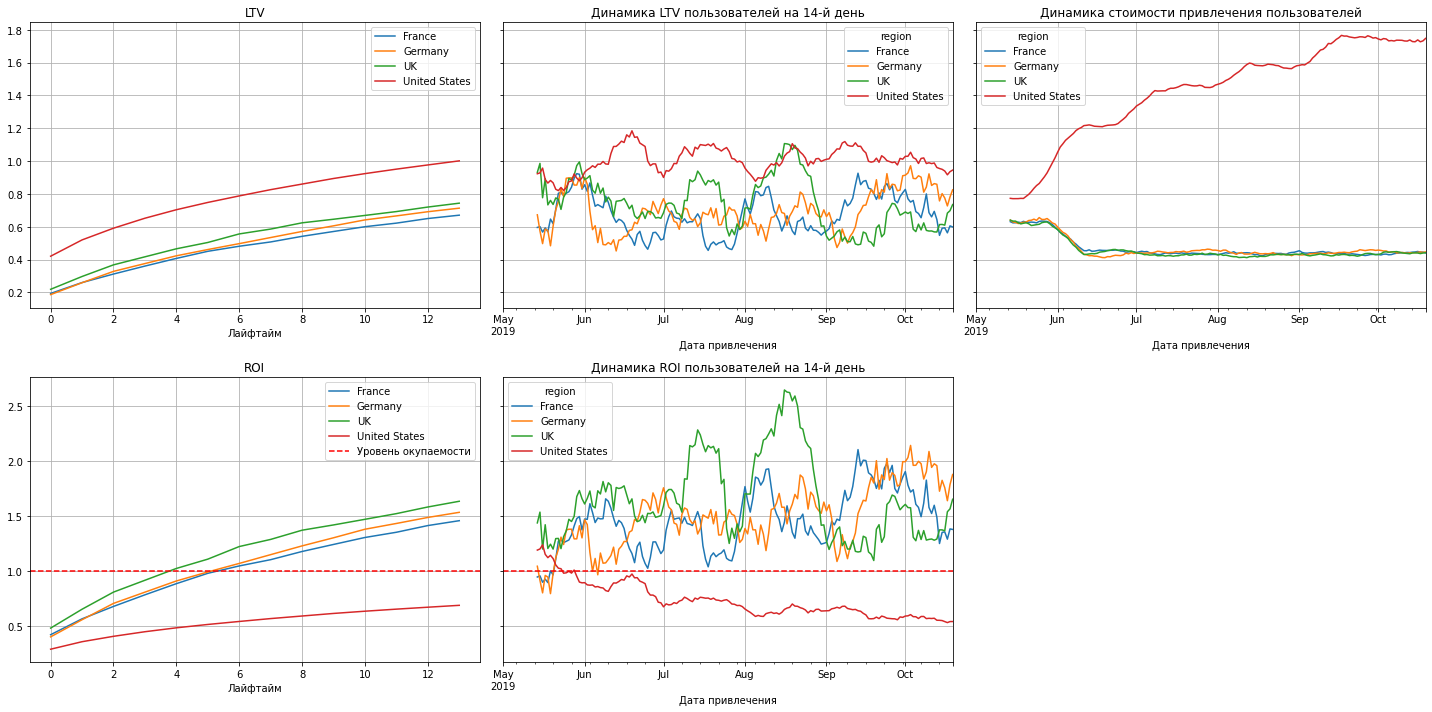

In [66]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вот что говорят графики:
Реклама не окупается в US.
Стоимость привлечения стабильна и одинакова для всех стран, кроме US.
LTV всё так же подвержен сезонности, но стабилен.
Мы нашли явного аутсайдера - US.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

In [67]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

result


lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0
channel,,,,,,,,,,,,,,,,,,,,,
AdNonSense,1869.62,2181.03,2385.63,2530.35,2616.18,2712.02,2791.86,2841.76,2921.63,2971.53,...,3522.52,3522.52,3522.52,3522.52,3522.52,3522.52,3522.52,3522.52,3522.52,3522.52
FaceBoom,16132.61,18201.76,19300.68,20075.23,20579.31,20943.60,21338.82,21615.36,21825.97,22056.55,...,24379.15,24379.15,24384.14,24384.14,24384.14,24384.14,24384.14,24384.14,24384.14,24384.14
LeapBob,867.41,1261.65,1665.84,1907.37,2103.98,2338.52,2549.10,2704.80,2994.41,3194.01,...,9364.48,9364.48,9364.48,9364.48,9364.48,9364.48,9364.48,9364.48,9364.48,9364.48
MediaTornado,572.90,798.46,1029.01,1223.71,1384.48,1529.20,1619.02,1743.78,1833.62,1923.44,...,5627.54,5627.54,5627.54,5632.53,5632.53,5632.53,5637.52,5637.52,5637.52,5637.52
OppleCreativeMedia,791.43,1070.91,1397.35,1681.81,1962.34,2166.93,2361.55,2519.24,2674.02,2823.73,...,8185.86,8185.86,8185.86,8185.86,8185.86,8185.86,8185.86,8185.86,8185.86,8185.86
RocketSuperAds,882.38,1354.54,1683.88,1938.37,2191.87,2427.40,2716.92,2921.52,3137.18,3358.79,...,11433.65,11433.65,11438.64,11438.64,11438.64,11438.64,11438.64,11438.64,11443.63,11443.63
TipTop,6354.98,9200.70,11545.36,13685.45,15581.94,17308.70,18750.98,20282.13,21668.56,23038.99,...,68406.05,68411.04,68416.03,68416.03,68416.03,68421.02,68421.02,68426.01,68435.99,68440.98
WahooNetBanner,1546.10,2355.72,3062.44,3586.42,4177.28,4602.45,5106.77,5481.02,5862.30,6186.67,...,19697.24,19697.24,19697.24,19702.23,19702.23,19702.23,19707.22,19707.22,19707.22,19707.22
YRabbit,669.86,875.46,1050.11,1246.73,1461.40,1591.14,1700.92,1800.73,1890.55,1970.39,...,6060.62,6060.62,6065.61,6065.61,6070.60,6070.60,6070.60,6070.60,6070.60,6070.60


cohort_size


,cohort_size
channel,
AdNonSense,3702
FaceBoom,27544
LeapBob,8103
MediaTornado,4167
OppleCreativeMedia,8139
RocketSuperAds,4251
TipTop,18498
WahooNetBanner,8082
YRabbit,4102


cac


,cac
channel,
AdNonSense,1.008023
FaceBoom,1.113419
LeapBob,0.210000
MediaTornado,0.219035
OppleCreativeMedia,0.249908
RocketSuperAds,0.417431
TipTop,2.757774
WahooNetBanner,0.601856
YRabbit,0.217087


roi1


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3672.536378,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,24738.226686,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
LeapBob,38585.714286,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
MediaTornado,19024.332764,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
OppleCreativeMedia,32568.004425,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,10183.714286,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,6707.584179,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
WahooNetBanner,13428.461823,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
YRabbit,18895.668677,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


roi2


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3672.536378,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,24738.226686,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
LeapBob,38585.714286,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
MediaTornado,19024.332764,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
OppleCreativeMedia,32568.004425,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,10183.714286,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,6707.584179,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
WahooNetBanner,13428.461823,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
YRabbit,18895.668677,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


result


lifetime                   0.0    1.0    2.0    3.0    4.0    5.0    6.0    \
channel        dt                                                            
AdNonSense     2019-05-01   9.98  14.97  14.97  14.97  19.96  19.96  19.96   
               2019-05-03   9.98  20.96  20.96  20.96  20.96  20.96  20.96   
               2019-05-04  24.95  29.94  29.94  29.94  29.94  29.94  29.94   
               2019-05-05  30.94  30.94  30.94  30.94  30.94  30.94  30.94   
               2019-05-06  19.96  19.96  19.96  19.96  19.96  24.95  24.95   
...                          ...    ...    ...    ...    ...    ...    ...   
lambdaMediaAds 2019-10-13   9.98  19.96  19.96  19.96  24.95  24.95  24.95   
               2019-10-14   9.98   9.98  14.97  14.97  14.97  14.97  19.96   
               2019-10-15   4.99   9.98  14.97  19.96  24.95  24.95  29.94   
               2019-10-16   4.99   4.99   4.99   9.98   9.98   9.98   9.98   
               2019-10-18   9.98   9.98   9.98  19.96  19.96  19.96  19.96   

lifetime                   7.0    8.0    9.0    ...  174.0  175.0  176.0  \
channel        dt                               ...                        
AdNonSense     2019-05-01  19.96  19.96  19.96  ...  29.94  29.94  29.94   
               2019-05-03  20.96  20.96  20.96  ...  40.92  40.92  40.92   
               2019-05-04  29.94  29.94  29.94  ...  34.93  34.93  34.93   
               2019-05-05  30.94  30.94  30.94  ...  35.93  35.93  35.93   
               2019-05-06  24.95  24.95  29.94  ...  34.93  34.93  34.93   
...                          ...    ...    ...  ...    ...    ...    ...   
lambdaMediaAds 2019-10-13  24.95  29.94  29.94  ...  44.91  44.91  44.91   
               2019-10-14  19.96  19.96  24.95  ...  34.93  34.93  34.93   
               2019-10-15  29.94  29.94  29.94  ...  54.89  54.89  54.89   
               2019-10-16   9.98   9.98   9.98  ...   9.98   9.98   9.98   
               2019-10-18  24.95  29.94  29.94  ...  44.91  44.91  44.91   

lifetime                   177.0  178.0  179.0  180.0  181.0  182.0  183.0  
channel        dt                                                           
AdNonSense     2019-05-01  29.94  29.94  29.94  29.94  29.94  29.94  29.94  
               2019-05-03  40.92  40.92  40.92  40.92  40.92  40.92  40.92  
               2019-05-04  34.93  34.93  34.93  34.93  34.93  34.93  34.93  
               2019-05-05  35.93  35.93  35.93  35.93  35.93  35.93  35.93  
               2019-05-06  34.93  34.93  34.93  34.93  34.93  34.93  34.93  
...                          ...    ...    ...    ...    ...    ...    ...  
lambdaMediaAds 2019-10-13  44.91  44.91  44.91  44.91  44.91  44.91  44.91  
               2019-10-14  34.93  34.93  34.93  34.93  34.93  34.93  34.93  
               2019-10-15  54.89  54.89  54.89  54.89  54.89  54.89  54.89  
               2019-10-16   9.98   9.98   9.98   9.98   9.98   9.98   9.98  
               2019-10-18  44.91  44.91  44.91  44.91  44.91  44.91  44.91  

[1363 rows x 184 columns]

cohort_size


cohort_size
channel        dt                     
AdNonSense     2019-05-01           39
               2019-05-02           36
               2019-05-03           45
               2019-05-04           51
               2019-05-05           36
...                                ...
lambdaMediaAds 2019-10-15           12
               2019-10-16           11
               2019-10-17            3
               2019-10-18           11
               2019-10-19            7

[1720 rows x 1 columns]

cac


cac
channel        dt                  
AdNonSense     2019-05-01  1.050000
               2019-05-02  0.962500
               2019-05-03  1.050000
               2019-05-04  1.008824
               2019-05-05  1.020833
...                             ...
lambdaMediaAds 2019-10-15  0.733333
               2019-10-16  0.727273
               2019-10-17  0.800000
               2019-10-18  0.727273
               2019-10-19  0.800000

[1720 rows x 1 columns]

roi1


cohort_size       0.0       1.0       2.0  \
channel        dt                                                      
AdNonSense     2019-05-01    37.142857  0.243712  0.365568  0.365568   
               2019-05-02    37.402597  0.000000  0.000000  0.000000   
               2019-05-03    42.857143  0.211217  0.443598  0.443598   
               2019-05-04    50.553936  0.484937  0.581924  0.581924   
               2019-05-05    35.265306  0.841905  0.841905  0.841905   
...                                ...       ...       ...       ...   
lambdaMediaAds 2019-10-15    16.363636  0.567045  1.134091  1.701136   
               2019-10-16    15.125000  0.623750  0.623750  0.623750   
               2019-10-17     3.750000  0.000000  0.000000  0.000000   
               2019-10-18    15.125000  1.247500  1.247500  1.247500   
               2019-10-19     8.750000  0.000000  0.000000  0.000000   

                                3.0       4.0       5.0       6.0       7.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.365568  0.487424  0.487424  0.487424  0.487424   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.443598  0.443598  0.443598  0.443598  0.443598   
               2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
               2019-05-05  0.841905  0.841905  0.841905  0.841905  0.841905   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-15  2.268182  2.835227  2.835227  3.402273  3.402273   
               2019-10-16  1.247500  1.247500  1.247500  1.247500  1.247500   
               2019-10-17  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-18  2.495000  2.495000  2.495000  2.495000  3.118750   
               2019-10-19  0.000000  0.000000  0.000000  0.000000  0.000000   

                                8.0       9.0      10.0      11.0      12.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.487424  0.487424  0.487424  0.487424  0.487424   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.443598  0.443598  0.443598  0.549206  0.549206   
               2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
               2019-05-05  0.841905  0.841905  0.841905  0.841905  0.977687   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-15  3.402273  3.402273  3.969318  3.969318  3.969318   
               2019-10-16  1.247500  1.247500  1.247500  1.247500  1.247500   
               2019-10-17  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-18  3.742500  3.742500  4.366250  4.990000  4.990000   
               2019-10-19  0.000000  0.000000  0.000000  0.000000  0.000000   

                               13.0  
channel        dt                    
AdNonSense     2019-05-01  0.487424  
               2019-05-02  0.000000  
               2019-05-03  0.549206  
               2019-05-04  0.581924  
               2019-05-05  0.977687  
...                             ...  
lambdaMediaAds 2019-10-15  5.103409  
               2019-10-16  1.247500  
               2019-10-17  0.000000  
               2019-10-18  5.613750  
               2019-10-19  0.000000  

[1720 rows x 15 columns]

roi2


cohort_size       0.0       1.0       2.0  \
channel        dt                                                      
AdNonSense     2019-05-01    37.142857  0.243712  0.365568  0.365568   
               2019-05-02    37.402597  0.000000  0.000000  0.000000   
               2019-05-03    42.857143  0.211217  0.443598  0.443598   
               2019-05-04    50.553936  0.484937  0.581924  0.581924   
               2019-05-05    35.265306  0.841905  0.841905  0.841905   
...                                ...       ...       ...       ...   
lambdaMediaAds 2019-10-15    16.363636  0.567045  1.134091  1.701136   
               2019-10-16    15.125000  0.623750  0.623750  0.623750   
               2019-10-17     3.750000  0.000000  0.000000  0.000000   
               2019-10-18    15.125000  1.247500  1.247500  1.247500   
               2019-10-19     8.750000  0.000000  0.000000  0.000000   

                                3.0       4.0       5.0       6.0       7.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.365568  0.487424  0.487424  0.487424  0.487424   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.443598  0.443598  0.443598  0.443598  0.443598   
               2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
               2019-05-05  0.841905  0.841905  0.841905  0.841905  0.841905   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-15  2.268182  2.835227  2.835227  3.402273  3.402273   
               2019-10-16  1.247500  1.247500  1.247500  1.247500  1.247500   
               2019-10-17  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-18  2.495000  2.495000  2.495000  2.495000  3.118750   
               2019-10-19  0.000000  0.000000  0.000000  0.000000  0.000000   

                                8.0       9.0      10.0      11.0      12.0  \
channel        dt                                                             
AdNonSense     2019-05-01  0.487424  0.487424  0.487424  0.487424  0.487424   
               2019-05-02  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-05-03  0.443598  0.443598  0.443598  0.549206  0.549206   
               2019-05-04  0.581924  0.581924  0.581924  0.581924  0.581924   
               2019-05-05  0.841905  0.841905  0.841905  0.841905  0.977687   
...                             ...       ...       ...       ...       ...   
lambdaMediaAds 2019-10-15  3.402273  3.402273  3.969318  3.969318  3.969318   
               2019-10-16  1.247500  1.247500  1.247500  1.247500  1.247500   
               2019-10-17  0.000000  0.000000  0.000000  0.000000  0.000000   
               2019-10-18  3.742500  3.742500  4.366250  4.990000  4.990000   
               2019-10-19  0.000000  0.000000  0.000000  0.000000  0.000000   

                               13.0  
channel        dt                    
AdNonSense     2019-05-01  0.487424  
               2019-05-02  0.000000  
               2019-05-03  0.549206  
               2019-05-04  0.581924  
               2019-05-05  0.977687  
...                             ...  
lambdaMediaAds 2019-10-15  5.103409  
               2019-10-16  1.247500  
               2019-10-17  0.000000  
               2019-10-18  5.613750  
               2019-10-19  0.000000  

[1720 rows x 15 columns]

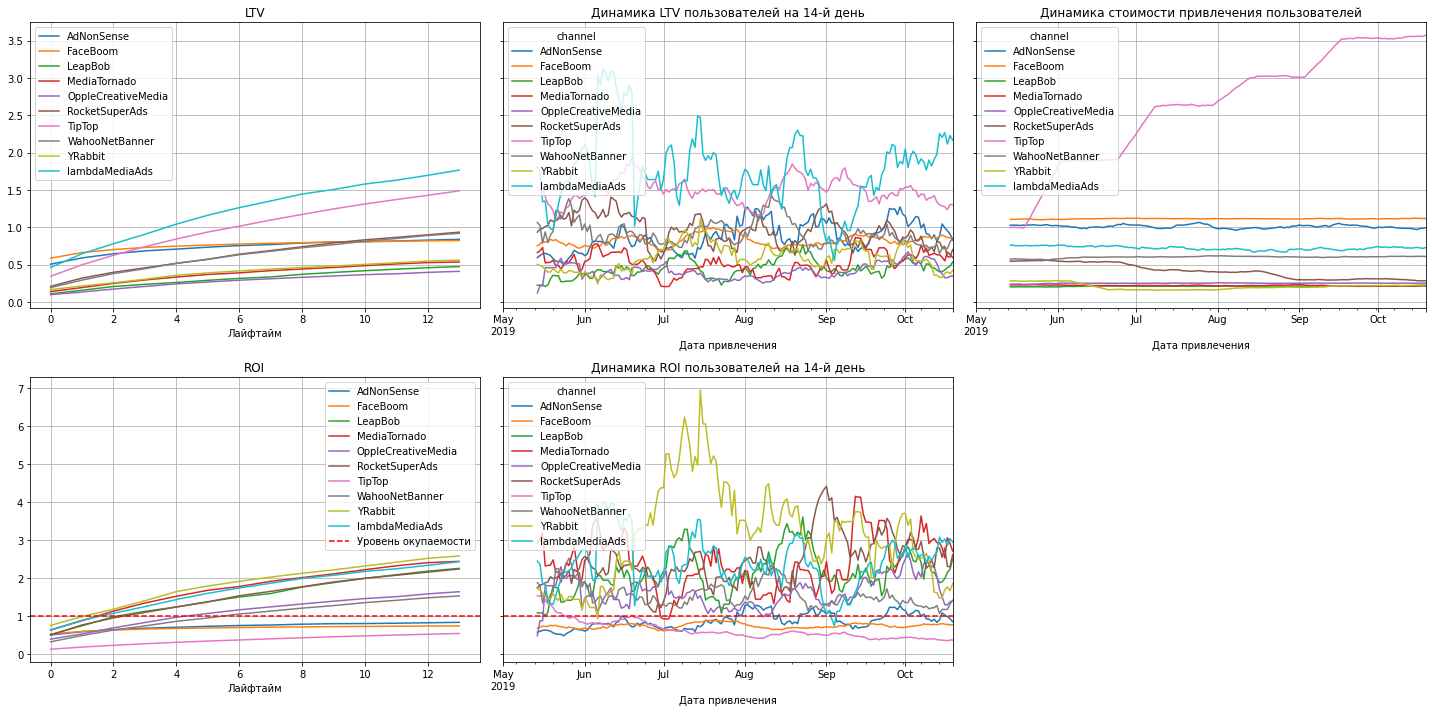

In [68]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Мы снова наблюдаем TipTop в качестве самого дорогого и растущего в цене рекламного канала, в то время, как он входит в тройку каналов, которые не пересекли черту окупаемости.

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Как мы выснили, лидером по привлечению является US, однако высокие и растущие затраты на рекламу в этой стране нивелируют эффект. Стоит поискать другой канал рекламы рекламы (более дешевый) - тут стоит обратить внимание на TipTop (очень дорого и продолжает расти, в то вмемя, как не окупается). В общей сложности рекламныйй бюджет распределен неравномерно - стоит обратить на это внимание. Есть каналы привлечения, которые при меньших затратах всё же пересекли черту окупаемости - стоит обратить вниманиее на них.
Стоит так же обратить внимание на платящих клиентов. идимо всее заканчиватся с первой покупкой - здесь есть зона роста.